## Analyse et Prédiction du Risque de Diabète


 Ce projet vise à segmenter les données de patients à risque de diabète en utilisant des modèles de clustering (comme K-Means). Une classification supervisée est ensuite appliquée pour prédire le risque de diabète avec précision, en évaluant plusieurs algorithmes (Random Forest, SVM, etc.) et en optimisant leurs performances.

In [2]:
pip install pandas

Note: you may need to restart the kernel to use updated packages.


In [3]:
import pandas as pd
df =  pd.read_csv("dataset-diabete.csv",index_col=0)

print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


## Analyser la structure

In [4]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 768 entries, 0 to 767
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
dtypes: float64(2), int64(6)
memory usage: 54.0 KB


In [6]:
print(df)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [7]:
print(df.isnull().sum())


Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
dtype: int64


In [8]:
print("Nombre de doublons :", df.duplicated().sum())


Nombre de doublons : 0


Analyser la distribution des variables numériques.

In [9]:
df_numeriques =  df.select_dtypes(include =['int','float'])
df_categoriques = df.select_dtypes(include=["object"])


In [10]:
df_numeriques.describe()


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000


## Créer la matrice de corrélation

In [11]:
correlation_matrix = df_numeriques.corr()

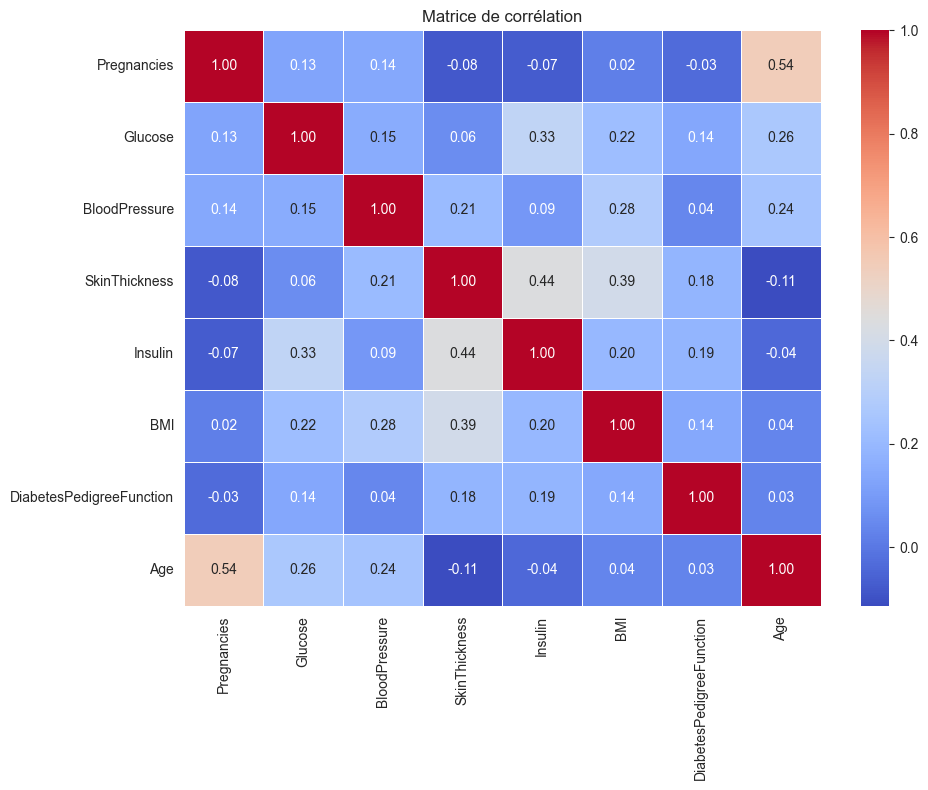

In [33]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()


 ### Prétraitement des données - Gestion des valeurs manquantes et aberrantes

Identifier et traiter les valeurs manquantes dans le jeu de données si elles existent.

In [13]:
import numpy as np

cols_replace_zero = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

df[cols_replace_zero] = df[cols_replace_zero].replace(0, np.nan)

In [14]:
df.isna().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

In [15]:
df.isnull().sum()

Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

## KNN

In [35]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
from scipy.stats import zscore

print("Original data shape:", df_numeriques.shape)
print("Missing values before KNN imputation:")
print(df_numeriques.isnull().sum())

knn_imputer = KNNImputer(n_neighbors=5, weights='uniform')

df_imputed = pd.DataFrame(
    knn_imputer.fit_transform(df_numeriques),
    columns=df_numeriques.columns,
    index=df_numeriques.index
)

print("\nAfter KNN imputation:")
print("Missing values:", df_imputed.isnull().sum().sum())
print("\nFirst 5 rows after imputation:")
print(df_imputed)

Original data shape: (768, 8)
Missing values before KNN imputation:
Pregnancies                   0
Glucose                       5
BloodPressure                35
SkinThickness               227
Insulin                     374
BMI                          11
DiabetesPedigreeFunction      0
Age                           0
dtype: int64

After KNN imputation:
Missing values: 0

First 5 rows after imputation:
     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0            6.0    148.0           72.0           35.0    169.0  33.6   
1            1.0     85.0           66.0           29.0     58.6  26.6   
2            8.0    183.0           64.0           25.8    164.6  23.3   
3            1.0     89.0           66.0           23.0     94.0  28.1   
4            0.0    137.0           40.0           35.0    168.0  43.1   
..           ...      ...            ...            ...      ...   ...   
763         10.0    101.0           76.0           48.0    180.0  32.9  

 ## Détecter outliers avec boîte à moustaches

Appliquer méthode IQR pour détecter outliers

In [36]:
IQRs = {}
for col in df_imputed.columns:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    outliers = df[(df[col] < Q1 - 1.5*IQR) | (df[col] > Q3 + 1.5*IQR)]
    print(f'Outliers dans {col}:')
    print(outliers[[col]])

Outliers dans Pregnancies:
     Pregnancies
88            15
159           17
298           14
455           14
Outliers dans Glucose:
Empty DataFrame
Columns: [Glucose]
Index: []
Outliers dans BloodPressure:
     BloodPressure
18            30.0
43           110.0
84           108.0
106          122.0
125           30.0
177          110.0
362          108.0
549          110.0
597           24.0
599           38.0
658          106.0
662          106.0
672          106.0
691          114.0
Outliers dans SkinThickness:
     SkinThickness
57            60.0
445           63.0
579           99.0
Outliers dans Insulin:
     Insulin
8      543.0
13     846.0
111    495.0
153    485.0
186    495.0
220    478.0
228    744.0
231    370.0
247    680.0
248    402.0
258    375.0
286    545.0
370    465.0
392    415.0
409    579.0
415    474.0
486    480.0
584    600.0
645    440.0
655    540.0
695    480.0
710    387.0
715    392.0
753    510.0
Outliers dans BMI:
      BMI
120  53.2
125  55.0
177 

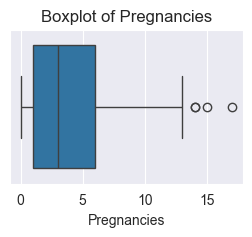

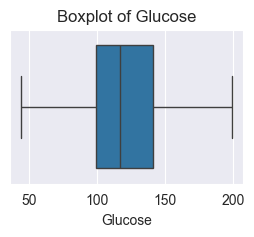

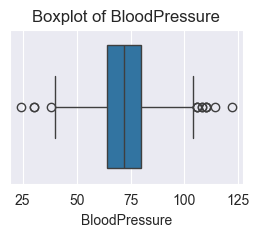

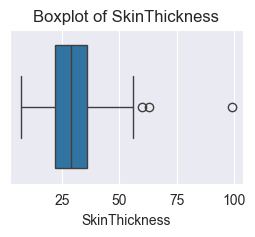

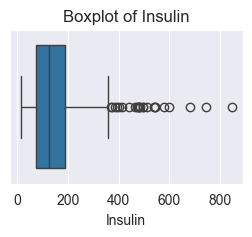

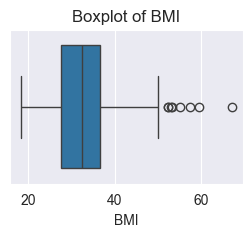

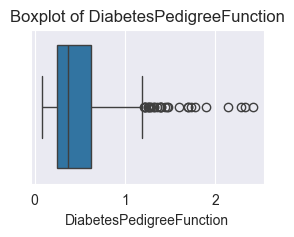

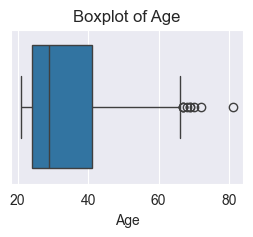

In [37]:
import seaborn

for col in df_imputed.columns:
    plt.figure(figsize=(3,2))
    sns.boxplot(x=df[col])
    plt.title(f'Boxplot of {col}')
    plt.show()

Appliquer méthode Z-score


--- Pregnancies ---
Upper limit: 13.95
Lower limit: -6.26
Number of outliers: 4
Before removing outliers: 768
After removing outliers: 764
Total outliers removed: 4


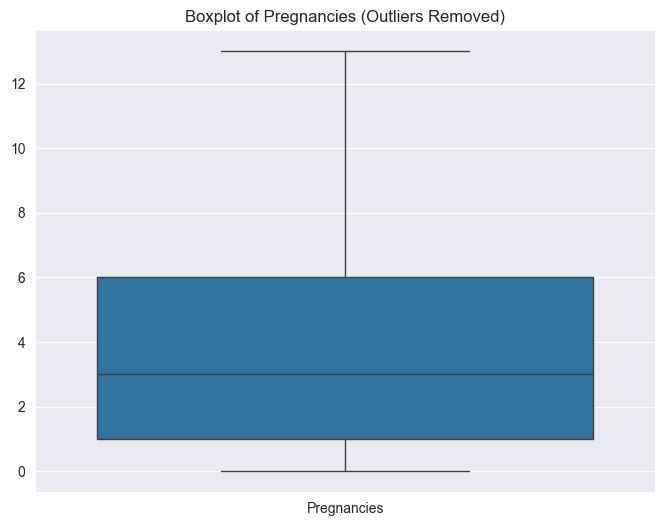


--- Glucose ---
Upper limit: 213.09
Lower limit: 30.11
Number of outliers: 0
Before removing outliers: 768
After removing outliers: 764
Total outliers removed: 4


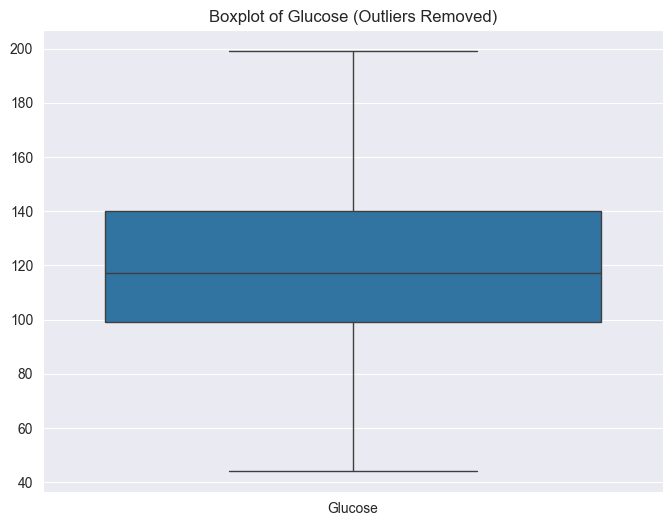


--- BloodPressure ---
Upper limit: 109.00
Lower limit: 35.76
Number of outliers: 8
Before removing outliers: 768
After removing outliers: 756
Total outliers removed: 12


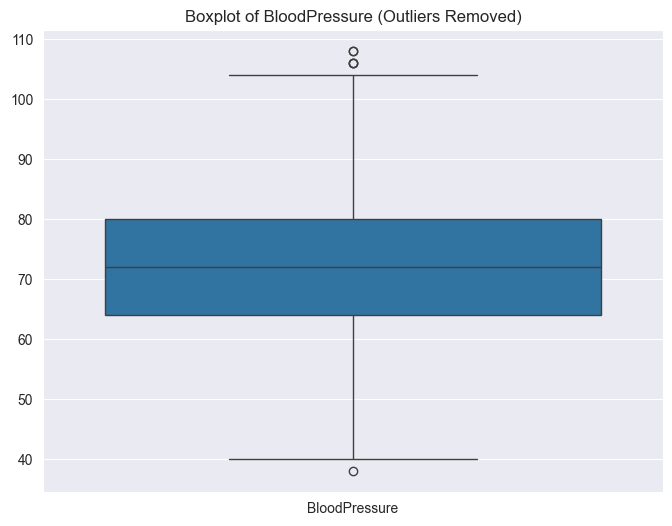


--- SkinThickness ---
Upper limit: 57.37
Lower limit: 0.84
Number of outliers: 3
Before removing outliers: 768
After removing outliers: 753
Total outliers removed: 15


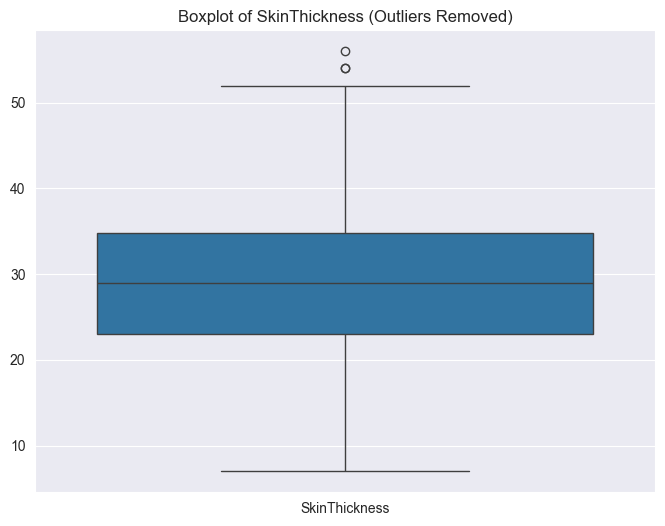


--- Insulin ---
Upper limit: 447.88
Lower limit: -141.75
Number of outliers: 18
Before removing outliers: 768
After removing outliers: 735
Total outliers removed: 33


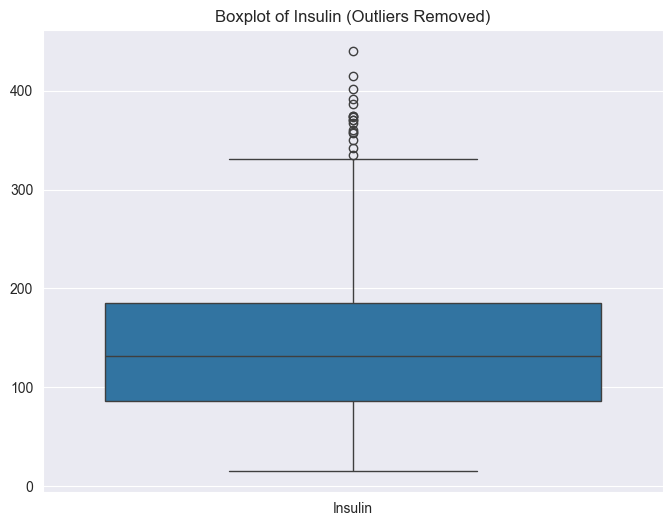


--- BMI ---
Upper limit: 53.08
Lower limit: 11.77
Number of outliers: 5
Before removing outliers: 768
After removing outliers: 733
Total outliers removed: 35


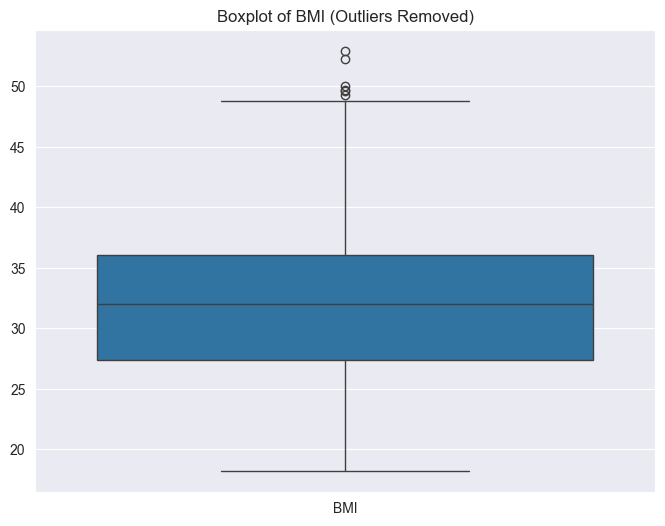


--- DiabetesPedigreeFunction ---
Upper limit: 1.47
Lower limit: -0.52
Number of outliers: 11
Before removing outliers: 768
After removing outliers: 725
Total outliers removed: 43


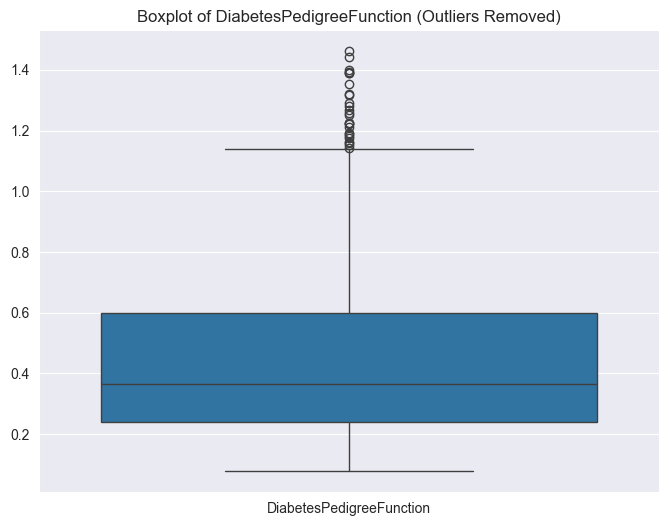


--- Age ---
Upper limit: 68.52
Lower limit: -2.04
Number of outliers: 5
Before removing outliers: 768
After removing outliers: 720
Total outliers removed: 48


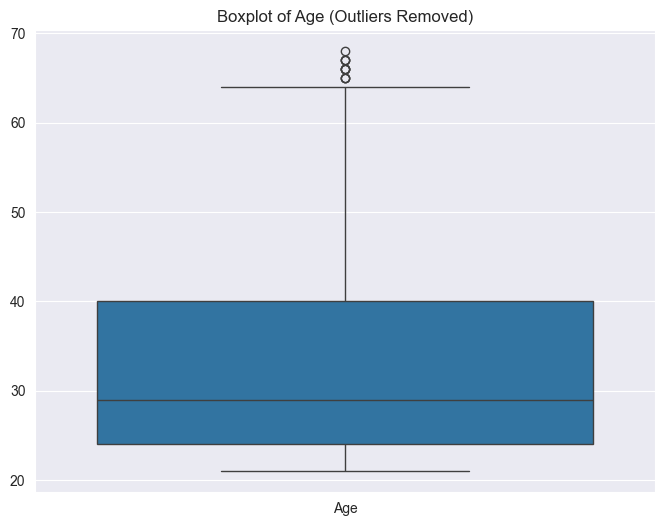

In [41]:
import seaborn as sns
import matplotlib.pyplot as plt

df_cleaned = df_imputed.copy()

for col in df_imputed.columns:
    upper_limit = df_imputed[col].mean() + 3 * df_imputed[col].std()
    lower_limit = df_imputed[col].mean() - 3 * df_imputed[col].std()

    print(f'\n--- {col} ---')
    print(f'Upper limit: {upper_limit:.2f}')
    print(f'Lower limit: {lower_limit:.2f}')

    outliers = df_imputed.loc[(df_imputed[col] > upper_limit) | (df_imputed[col] < lower_limit)]
    print(f'Number of outliers: {len(outliers)}')
    df_cleaned = df_cleaned.loc[(df_cleaned[col] <= upper_limit) & (df_cleaned[col] >= lower_limit)]
    print(f'Before removing outliers: {len(df_imputed)}')
    print(f'After removing outliers: {len(df_cleaned)}')
    print(f'Total outliers removed: {len(df_imputed) - len(df_cleaned)}')
    plt.figure(figsize=(8, 6))
    sns.boxplot(data=df_cleaned[[col]])
    plt.title(f'Boxplot of {col} (Outliers Removed)')
    plt.show()


Étudier les relations entre variables

In [43]:
correlation_matrix = df_cleaned.corr()


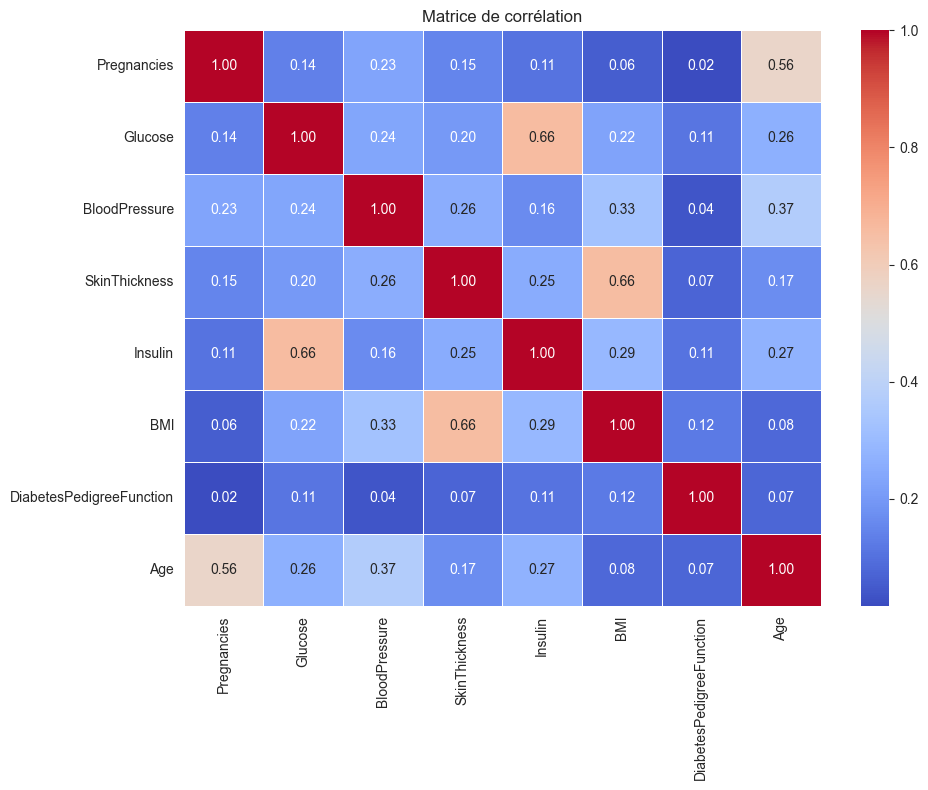

In [44]:
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title("Matrice de corrélation")
plt.tight_layout()
plt.show()

## Sélectionner variables à forte variabilité

In [46]:
df_cleaned.var()

Pregnancies                   10.746405
Glucose                      875.518368
BloodPressure                130.883073
SkinThickness                 78.271228
Insulin                     5675.468402
BMI                           42.071927
DiabetesPedigreeFunction       0.079860
Age                          126.990170
dtype: float64